In [1]:
from __future__ import division  # always use float division
import numpy as np
from scipy.spatial.distance import cdist  # fast distance matrices
from scipy.cluster.hierarchy import dendrogram  # you can use this
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for when you create your own dendrogram

In [2]:
X = np.array([[0., 1., 1., 10., 10.25, 11., 10., 10.25, 11.],
                  [0., 0., 1.,  0.,   0.5,  0.,  5.,   5.5,  5.]]).T
k = 3

In [3]:
X

array([[ 0.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  1.  ],
       [10.  ,  0.  ],
       [10.25,  0.5 ],
       [11.  ,  0.  ],
       [10.  ,  5.  ],
       [10.25,  5.5 ],
       [11.  ,  5.  ]])

In [4]:
def kmeans(X, k, max_iter=100):
    muselect = 0
    mu = np.random.rand(k, len(X[0]))
    if muselect == 1:
        mins = np.min(X, axis=0)
        maxs = np.max(X, axis=0)
        mu = np.random.rand(k, len(X[0]))
        mu += mins
        mu *= maxs
    elif muselect == 0:
        X_shuffle = np.array(X)
        np.random.shuffle(X_shuffle)
        mu = X_shuffle[0:k]
    r = np.empty(len(X))
    r_new = np.ones(len(X))
    iteration = 0
    error=0.
    while not np.array_equal(r,r_new) and iteration < max_iter:
        error=0.
        iteration+=1
        print('Peforming iteration ' + str(iteration) + ':')
        r = r_new
        dis = (-2 * X @ mu.T + (np.sum(X ** 2, axis=1) + np.sum(mu ** 2, axis=1)[:, np.newaxis]).T)**0.5
        r_new = np.argmin(dis, axis=1)
        print('Changed cluster memberships: ' +  str(np.count_nonzero(r_new-r)) + ' datapoints')
        for i in range(0, k):
            if(len(np.where(r_new==i)[0])>0):
                mu[i] = np.sum(X[np.where(r_new==i)], axis=0)/len(np.where(r_new==i)[0])
                error += np.sum(dis[np.where(r_new==i),i])
            else:
                mu[i] = np.random.rand(len(mins))
        print('Loss: ' + str(error))
    return mu, r_new, error

In [5]:
mu, r, _ = kmeans(X, k=3)

Peforming iteration 1:
Changed cluster memberships: 6 datapoints
Loss: 17.065956088704933
Peforming iteration 2:
Changed cluster memberships: 3 datapoints
Loss: 16.71115982552417
Peforming iteration 3:
Changed cluster memberships: 0 datapoints
Loss: 4.818351614360072


In [6]:
mu

array([[10.41666667,  5.16666667],
       [ 0.66666667,  0.33333333],
       [10.41666667,  0.16666667]])

In [7]:
r

array([1, 1, 1, 2, 2, 2, 0, 0, 0])

In [218]:
mus = np.array([[ 1., 1.], [10.41666667,  2.66666667], [ 0.5,         0.        ]])
mus2 = np.array([[10.41666667,  5.16666667],
 [10.41666667,  0.16666667],
 [ 0.66666667,  0.33333333]])

In [216]:
mus

array([[ 1.        ,  1.        ],
       [10.41666667,  2.66666667],
       [ 0.5       ,  0.        ]])

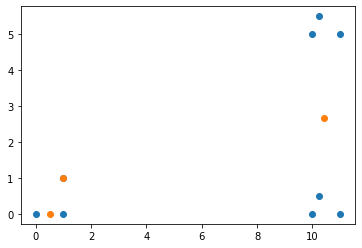

In [284]:
plt.scatter(X.T[0], X.T[1])
plt.scatter(mus.T[0], mus.T[1])
#plt.scatter(mus2.T[0], mus2.T[1], c='violet')
plt.show()

In [107]:

dis = (-2 * X @ mu.T + (np.sum(X ** 2, axis=1) + np.sum(mu ** 2, axis=1)[:, np.newaxis]).T)**0.5
r = np.argmin(dis, axis=1)
mu_new = np.zeros((k, 2))
for i in range(0, k):
    mu_new[i] = np.sum(X[np.where(r==i)], axis=0)/len(np.where(r==i)[0])

In [106]:
mu, r, _ = imp.kmeans(self.X, k=3)

array([[10.25240567,  1.23491774],
       [10.52492282,  3.00431647],
       [ 2.43779081,  4.49821649]])

In [108]:
mu_new

array([[10.41666667,  0.16666667],
       [10.41666667,  5.16666667],
       [ 0.5       ,  1.5       ]])

In [84]:
len(np.where(r==0)[0])

6

In [95]:
np.vstack([X.T, r]).T

array([[ 0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  ],
       [10.  ,  0.  ,  0.  ],
       [10.25,  0.5 ,  0.  ],
       [11.  ,  0.  ,  0.  ],
       [10.  ,  5.  ,  0.  ],
       [10.25,  5.5 ,  0.  ],
       [11.  ,  5.  ,  0.  ],
       [ 0.  ,  5.  ,  2.  ]])

In [109]:
r

array([2, 2, 2, 0, 0, 0, 1, 1, 1, 2])

In [ ]:
k * d